In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
folder = 'harth'
df_list = []

for f in os.listdir(folder):
    file = os.path.join(folder, f)
    df_temp = pd.read_csv(file)
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)
df = df.drop(columns=['index', 'Unnamed: 0'])
print('\nDataframe Info:')
print(df.info())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 394.4+ MB
None


In [2]:
NaNs_data_df =  df.isnull().sum()
print("Check empty data:")
print(NaNs_data_df)

Check empty data:
timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64


In [7]:
df_stats = df.describe()
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06
mean,-8.849574e-01,-1.326128e-02,-1.693779e-01,-5.948883e-01,2.087665e-02,3.749160e-01,6.783833e+00
std,3.775916e-01,2.311709e-01,3.647385e-01,6.263466e-01,3.884511e-01,7.360983e-01,1.143238e+01
min,-8.000000e+00,-4.307617e+00,-6.574463e+00,-8.000000e+00,-7.997314e+00,-8.000000e+00,1.000000e+00
25%,-1.002393e+00,-8.312914e-02,-3.720700e-01,-9.742110e-01,-1.000873e-01,-1.557138e-01,3.000000e+00
50%,-9.748998e-01,2.593677e-03,-1.374510e-01,-4.217309e-01,3.262909e-02,7.004390e-01,7.000000e+00
75%,-8.123032e-01,7.251000e-02,4.647321e-02,-1.678755e-01,1.549512e-01,9.486747e-01,7.000000e+00
max,2.291708e+00,6.491943e+00,4.909483e+00,7.999756e+00,7.999756e+00,8.406235e+00,1.400000e+02


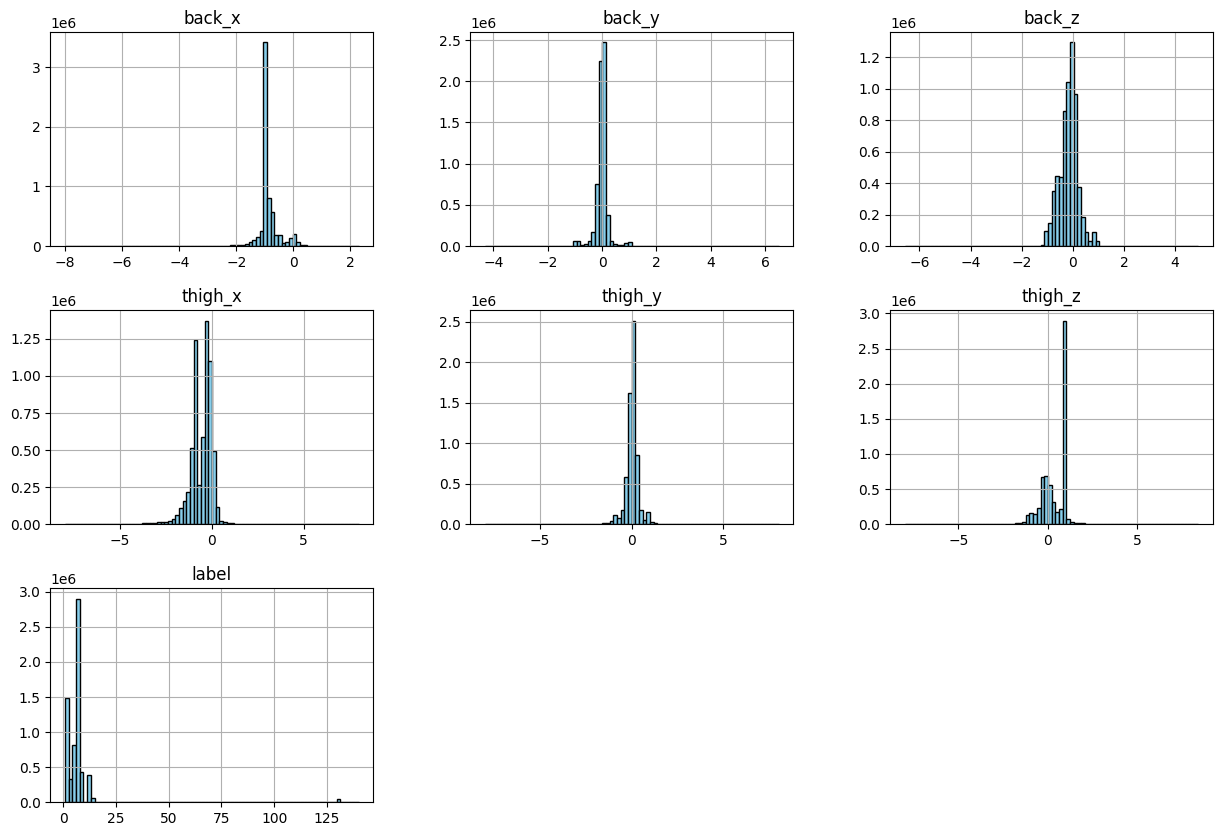

In [8]:
hist_df = df.drop(['timestamp'], axis = 1)
hist = hist_df.hist(bins=80, layout=(3, 3), figsize=(15, 10), color='skyblue', edgecolor='black')
plt.show()

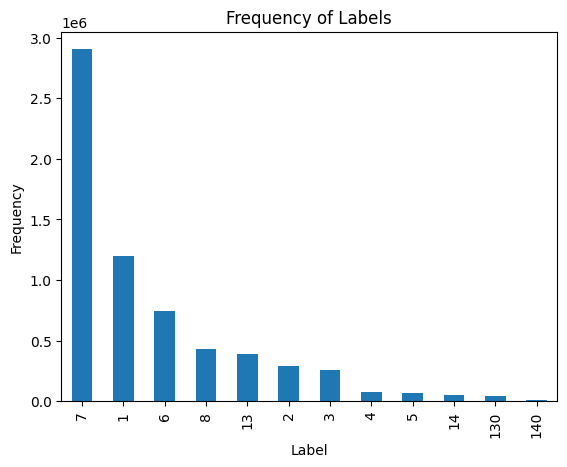

In [9]:
df['label'].value_counts().plot(kind='bar')
plt.title('Frequency of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

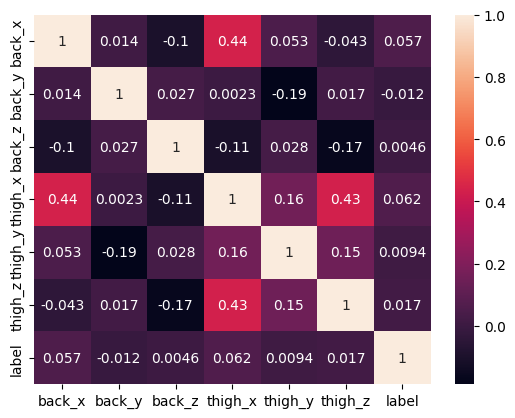

In [12]:
corr_df = df.drop(['timestamp'], axis = 1)
sns.heatmap(corr_df.corr(),annot=True)
plt.show()

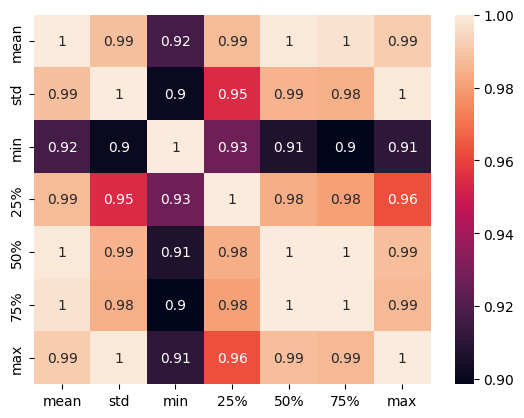

In [13]:
transposed_df = df_stats.T
selected_stats = transposed_df.drop(['count'], axis = 1)

sns.heatmap(selected_stats.corr(),annot=True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
def select_classifier(option):
    if option == 1:
        classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
    elif option == 2:
        classifier = MLPClassifier(max_iter=10000, activation='logistic', random_state=42)
    elif option == 3:
        classifier = GaussianNB()
    else:
        raise ValueError("option values are : 1,2,3")
    return classifier

In [24]:
def run_classification(X,Y,classifier = 1):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)
#training
    model = select_classifier(classifier)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print("---------------------------------------------------------------------")
    print(f"Classifier {classifier} yeilds training accuracy of {model.score(X_train,y_train)}\n with a testing accuracy of {accuracy_score(y_test, predictions)}")
    return classifier,model.score(X_train,y_train),accuracy_score(y_test, predictions)

In [25]:
X = df.drop(['label', 'timestamp'],axis = 1)
Y = df['label']

models_train_acc = []
models_test_acc = []

for i in range (1,4):
    classifier, train_acc, test_acc = run_classification(X,Y,i)
    models_train_acc.append(train_acc)
    models_test_acc.append(test_acc)

In [6]:
df = pd.DataFrame(data=[[1,2,3]]*5, index=range(3, 8), columns = ['a','b','c'])
df[['b', 'c']].iloc[:].mean()


b    2.0
c    3.0
dtype: float64